In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
ecdc_iniziale=pd.read_csv(r'C:\Users\strag\Documents\GitHub\CovidAnalysis4CPDM\PROGETTO\ECDC dataset iniziale.csv')
ecdc_iniziale.head(30)

,YearWeekISO,ReportingCountry,Denominator,NumberDosesReceived,NumberDosesExported,FirstDose,FirstDoseRefused,SecondDose,DoseAdditional1,UnknownDose,Region,TargetGroup,Vaccine,Population
0,2020-W53,AT,8901064.0,61425.0,0.0,5282,NaN,0,0,0,AT,ALL,COM,8901064
1,2020-W53,AT,8901064.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,MOD,8901064
2,2020-W53,AT,8901064.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,JANSS,8901064
3,2020-W53,AT,8901064.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,AZ,8901064
4,2020-W53,AT,8901064.0,0.0,0.0,1,NaN,0,0,0,AT,ALL,UNK,8901064
5,2020-W53,AT,435835.0,0.0,0.0,0,NaN,0,0,0,AT,Age0_4,JANSS,8901064
6,2020-W53,AT,435835.0,0.0,0.0,0,NaN,0,0,0,AT,Age0_4,AZ,8901064
7,2020-W53,AT,435835.0,0.0,0.0,0,NaN,0,0,0,AT,Age0_4,UNK,8901064
8,2020-W53,AT,435835.0,0.0,0.0,0,NaN,0,0,0,AT,Age0_4,MOD,8901064
9,2020-W53,AT,435835.0,61425.0,0.0,1,NaN,0,0,0,AT,Age0_4,COM,8901064


In [68]:
ecdc_iniziale.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212916 entries, 0 to 212915
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YearWeekISO          212916 non-null  object 
 1   ReportingCountry     212916 non-null  object 
 2   Denominator          122432 non-null  float64
 3   NumberDosesReceived  31519 non-null   float64
 4   NumberDosesExported  21682 non-null   float64
 5   FirstDose            212916 non-null  int64  
 6   FirstDoseRefused     1434 non-null    float64
 7   SecondDose           212916 non-null  int64  
 8   DoseAdditional1      212916 non-null  int64  
 9   UnknownDose          212916 non-null  int64  
 10  Region               212916 non-null  object 
 11  TargetGroup          212916 non-null  object 
 12  Vaccine              212916 non-null  object 
 13  Population           212916 non-null  int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 22.7+ MB


In [69]:
ecdc_iniziale.columns

Index(['YearWeekISO', 'ReportingCountry', 'Denominator', 'NumberDosesReceived',
       'NumberDosesExported', 'FirstDose', 'FirstDoseRefused', 'SecondDose',
       'DoseAdditional1', 'UnknownDose', 'Region', 'TargetGroup', 'Vaccine',
       'Population'],
      dtype='object')

In [70]:
ecdc_iniziale.drop(['NumberDosesReceived','NumberDosesExported', 'FirstDoseRefused'], axis=1, inplace=True)

In [71]:
ecdc_iniziale.head()

,YearWeekISO,ReportingCountry,Denominator,FirstDose,SecondDose,DoseAdditional1,UnknownDose,Region,TargetGroup,Vaccine,Population
0,2020-W53,AT,8901064.0,5282,0,0,0,AT,ALL,COM,8901064
1,2020-W53,AT,8901064.0,0,0,0,0,AT,ALL,MOD,8901064
2,2020-W53,AT,8901064.0,0,0,0,0,AT,ALL,JANSS,8901064
3,2020-W53,AT,8901064.0,0,0,0,0,AT,ALL,AZ,8901064
4,2020-W53,AT,8901064.0,1,0,0,0,AT,ALL,UNK,8901064


In [72]:
import plotly.graph_objs as go
import plotly.io as pio
import plotly.express as px
pio.renderers.default='plotly_mimetype+notebook'

In [73]:
italy_df=ecdc_iniziale.copy()
group=['IT']
italy_df = italy_df[italy_df['ReportingCountry'].isin(group)]
italy_df


,YearWeekISO,ReportingCountry,Denominator,FirstDose,SecondDose,DoseAdditional1,UnknownDose,Region,TargetGroup,Vaccine,Population
132810,2020-W52,IT,4879133.0,880,0,0,0,ITH3,ALL,COM,59641488
132811,2020-W52,IT,1206216.0,262,0,0,0,ITH4,ALL,COM,59641488
132812,2020-W52,IT,4464119.0,972,0,0,0,ITH5,ALL,COM,59641488
132813,2020-W52,IT,3692555.0,620,0,0,0,ITI1,ALL,COM,59641488
132814,2020-W52,IT,1293941.0,38,0,0,0,ITF1,ALL,COM,59641488
...,...,...,...,...,...,...,...,...,...,...,...
138413,2021-W52,IT,NaN,0,0,0,10164,IT,HCW,MOD,59641488
138414,2021-W52,IT,NaN,0,0,0,0,IT,HCW,JANSS,59641488
138415,2021-W52,IT,NaN,0,0,0,3663,IT,LTCF,COM,59641488
138416,2021-W52,IT,NaN,0,0,0,3403,IT,LTCF,MOD,59641488


In [74]:
italy_df['tot doses']= italy_df['FirstDose']+italy_df['SecondDose']+ italy_df['DoseAdditional1']+italy_df['UnknownDose']
italy_df.head(30)


,YearWeekISO,ReportingCountry,Denominator,FirstDose,SecondDose,DoseAdditional1,UnknownDose,Region,TargetGroup,Vaccine,Population,tot doses
132810,2020-W52,IT,4879133.0,880,0,0,0,ITH3,ALL,COM,59641488,880
132811,2020-W52,IT,1206216.0,262,0,0,0,ITH4,ALL,COM,59641488,262
132812,2020-W52,IT,4464119.0,972,0,0,0,ITH5,ALL,COM,59641488,972
132813,2020-W52,IT,3692555.0,620,0,0,0,ITI1,ALL,COM,59641488,620
132814,2020-W52,IT,1293941.0,38,0,0,0,ITF1,ALL,COM,59641488,38
132815,2020-W52,IT,870165.0,84,0,0,0,ITI2,ALL,COM,59641488,84
132816,2020-W52,IT,1524826.0,135,0,0,0,ITC3,ALL,COM,59641488,135
132817,2020-W52,IT,1512672.0,205,0,0,0,ITI3,ALL,COM,59641488,205
132818,2020-W52,IT,1894110.0,312,0,0,0,ITF6,ALL,COM,59641488,312
132819,2020-W52,IT,4875290.0,92,0,0,0,ITG1,ALL,COM,59641488,92


In [75]:
italy_df[['Year', 'Week']]=italy_df['YearWeekISO'].str.split('-', expand=True)
italy_df


,YearWeekISO,ReportingCountry,Denominator,FirstDose,SecondDose,DoseAdditional1,UnknownDose,Region,TargetGroup,Vaccine,Population,tot doses,Year,Week
132810,2020-W52,IT,4879133.0,880,0,0,0,ITH3,ALL,COM,59641488,880,2020,W52
132811,2020-W52,IT,1206216.0,262,0,0,0,ITH4,ALL,COM,59641488,262,2020,W52
132812,2020-W52,IT,4464119.0,972,0,0,0,ITH5,ALL,COM,59641488,972,2020,W52
132813,2020-W52,IT,3692555.0,620,0,0,0,ITI1,ALL,COM,59641488,620,2020,W52
132814,2020-W52,IT,1293941.0,38,0,0,0,ITF1,ALL,COM,59641488,38,2020,W52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138413,2021-W52,IT,NaN,0,0,0,10164,IT,HCW,MOD,59641488,10164,2021,W52
138414,2021-W52,IT,NaN,0,0,0,0,IT,HCW,JANSS,59641488,0,2021,W52
138415,2021-W52,IT,NaN,0,0,0,3663,IT,LTCF,COM,59641488,3663,2021,W52
138416,2021-W52,IT,NaN,0,0,0,3403,IT,LTCF,MOD,59641488,3403,2021,W52


Voglio calcolare il totale delle dosi somministarte settimanalmente per ciascuna regione italiana?
Per iniziare rinonimo i nomi delle regioni nelle colonne

In [76]:
italy_df.replace("ITH3", "Veneto", inplace=True)
italy_df.replace("ITH4", "Friuli-Venezia Giulia", inplace=True)
italy_df.replace("ITH5", "Emilia-Romagna", inplace=True)
italy_df.replace("ITH1", "Trentino-Alto Adige", inplace=True)
italy_df.replace("ITH2", "Trentino-Alto Adige", inplace=True)
italy_df.replace("ITI1", "Toscana", inplace=True)
italy_df.replace("ITI2", "Umbria", inplace=True)
italy_df.replace("ITI3", "Marche", inplace=True)
italy_df.replace("ITI4", "Lazio", inplace=True)
italy_df.replace("ITC1", "Piemonte", inplace=True)
italy_df.replace("ITC2", "Valle d'Aosta", inplace=True)
italy_df.replace("ITC3", "Liguria", inplace=True)
italy_df.replace("ITC4", "Lombardia", inplace=True)
italy_df.replace("ITF1", "Abruzzo", inplace=True)
italy_df.replace("ITF2", "Molise", inplace=True)
italy_df.replace("ITF3", "Campania", inplace=True)
italy_df.replace("ITF4", "Puglia", inplace=True)
italy_df.replace("ITF5", "Basilicata", inplace=True)
italy_df.replace("ITF6", "Calabria", inplace=True)
italy_df.replace("ITG1", "Sicilia", inplace=True)
italy_df.replace("ITG2", "Sardegna", inplace=True)
italy_df.replace("IT", "Nazionale", inplace=True)



In [77]:
italy_df.drop(['ReportingCountry'], axis=1, inplace=True)

DATASET PULITO PER ITALIA! (occorre eliminare HCW e LTCF)

In [78]:
italy_df.head(30)

,YearWeekISO,Denominator,FirstDose,SecondDose,DoseAdditional1,UnknownDose,Region,TargetGroup,Vaccine,Population,tot doses,Year,Week
132810,2020-W52,4879133.0,880,0,0,0,Veneto,ALL,COM,59641488,880,2020,W52
132811,2020-W52,1206216.0,262,0,0,0,Friuli-Venezia Giulia,ALL,COM,59641488,262,2020,W52
132812,2020-W52,4464119.0,972,0,0,0,Emilia-Romagna,ALL,COM,59641488,972,2020,W52
132813,2020-W52,3692555.0,620,0,0,0,Toscana,ALL,COM,59641488,620,2020,W52
132814,2020-W52,1293941.0,38,0,0,0,Abruzzo,ALL,COM,59641488,38,2020,W52
132815,2020-W52,870165.0,84,0,0,0,Umbria,ALL,COM,59641488,84,2020,W52
132816,2020-W52,1524826.0,135,0,0,0,Liguria,ALL,COM,59641488,135,2020,W52
132817,2020-W52,1512672.0,205,0,0,0,Marche,ALL,COM,59641488,205,2020,W52
132818,2020-W52,1894110.0,312,0,0,0,Calabria,ALL,COM,59641488,312,2020,W52
132819,2020-W52,4875290.0,92,0,0,0,Sicilia,ALL,COM,59641488,92,2020,W52


In [79]:
italy_df=italy_df[(italy_df.TargetGroup!='LTCF') & (italy_df.TargetGroup!='HCW')]

In [80]:
#dataframe con solo valori per le singole regioni!! 
region_df=italy_df[(italy_df.Region!='Nazionale')]

In [81]:
#dataframe per regioni italiane nel 2021
region_df_21=region_df[region_df["Year"]=='2021']

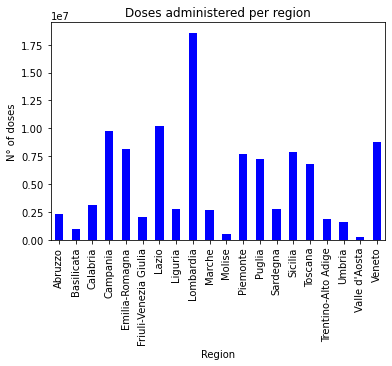

In [82]:
#GRAFICO DOSI SOMMINISTRATE PER REGIONI IN ITALIA NEL 2021 (fare meglio)
group_reg=region_df_21.groupby(['Region'])['tot doses'].sum()
group_reg.plot(kind='bar', color= 'blue', title='Doses administered per region')
plt.ylabel('N° of doses')
plt.savefig('Doses administered per region.jpeg', dpi=300, bbox_inches='tight')
plt.show()



In [83]:
#CIFRE PER REGIONE
group_reg

Region
Abruzzo                   2308549
Basilicata                 978192
Calabria                  3119830
Campania                  9753795
Emilia-Romagna            8113677
Friuli-Venezia Giulia     2083161
Lazio                    10250876
Liguria                   2757777
Lombardia                18574964
Marche                    2691664
Molise                     537971
Piemonte                  7692076
Puglia                    7225860
Sardegna                  2806840
Sicilia                   7884075
Toscana                   6838027
Trentino-Alto Adige       1856199
Umbria                    1571891
Valle d'Aosta              213688
Veneto                    8766473
Name: tot doses, dtype: int64

In [84]:
#DATAFRAME DOSI PER FASCE D'ETA' NEL 2020-21
italy_fasce=italy_df[(italy_df.Region=='Nazionale')]
italy_fasce=italy_fasce[italy_fasce.TargetGroup!='ALL']
italy_fasce.tail(30)

,YearWeekISO,Denominator,FirstDose,SecondDose,DoseAdditional1,UnknownDose,Region,TargetGroup,Vaccine,Population,tot doses,Year,Week
138320,2021-W51,9433159.0,110168,22853,1826,0,Nazionale,Age<18,COM,59641488,134847,2021,W51
138321,2021-W51,9433159.0,10490,5013,924,0,Nazionale,Age<18,MOD,59641488,16427,2021,W51
138384,2021-W52,4121339.0,4533,5285,92115,0,Nazionale,Age18_24,MOD,59641488,101933,2021,W52
138385,2021-W52,4121339.0,24,0,0,0,Nazionale,Age18_24,JANSS,59641488,24,2021,W52
138386,2021-W52,4121339.0,2998,7005,51760,0,Nazionale,Age18_24,COM,59641488,61763,2021,W52
138387,2021-W52,4121339.0,0,0,0,0,Nazionale,Age18_24,AZ,59641488,0,2021,W52
138388,2021-W52,18920355.0,102,0,0,0,Nazionale,Age25_49,JANSS,59641488,102,2021,W52
138389,2021-W52,18920355.0,20522,21544,442468,0,Nazionale,Age25_49,MOD,59641488,484534,2021,W52
138390,2021-W52,18920355.0,0,0,0,0,Nazionale,Age25_49,AZ,59641488,0,2021,W52
138391,2021-W52,18920355.0,13196,25457,195450,0,Nazionale,Age25_49,COM,59641488,234103,2021,W52


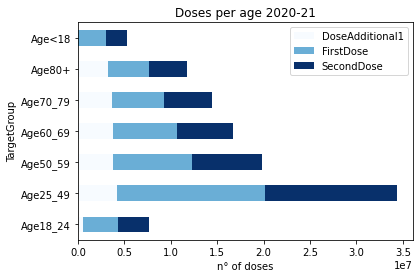

In [85]:
#GRAFICO DOSI PER FASCE D'ETA' IN ITALIA NEL 2020-21
table_doses=pd.pivot_table(italy_fasce, values=['FirstDose', 'SecondDose', 'DoseAdditional1'],index=['TargetGroup'],aggfunc='sum')
table_doses.plot(kind='barh',stacked=True, title='Doses per age 2020-21', colormap='Blues')
plt.xlabel('n° of doses')
plt.savefig('Doses per age in Italy 2021.jpeg', dpi=300, bbox_inches='tight')
plt.show()

In [86]:
table_doses

,DoseAdditional1,FirstDose,SecondDose
TargetGroup,,,
Age18_24,572395,3728734,3304256
Age25_49,4145443,15950694,14272285
Age50_59,3768467,8506568,7541659
Age60_69,3781922,6863686,6047049
Age70_79,3609671,5606531,5189887
Age80+,3266520,4367551,4157488
Age<18,30554,2965666,2322372


In [87]:
#Tot dosi somministrate in italia tra 2020 e 2021
total_italy=italy_df[(italy_df.Region=='Nazionale') & (italy_df.TargetGroup=='ALL') | (italy_df.TargetGroup=='Age<18')]
total_italy.groupby(['Year'])['tot doses'].sum()

Year
2020       124543
2021    109877005
Name: tot doses, dtype: int64

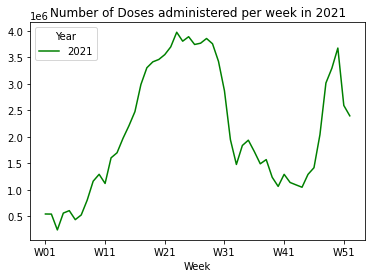

In [96]:
#PIVOT TABLE DA INCORPORARE CON ICU MEAN PATIENTS PER WEEK (-> VACCINAZIONI NEL 2021)
total_italy_2021=total_italy[(total_italy.Year=='2021')]
table1=total_italy_2021.pivot_table(index='Week', columns='Year', values='tot doses', aggfunc= 'sum')
table1.plot(kind='line', color='green',title='Number of Doses administered per week in 2021')
plt.savefig('Number of Doses administered per week in 2021.jpeg', dpi=300, bbox_inches='tight')
plt.show()
#sistemare legenda che non mi piace

In [92]:
table1

Year,2021
Week,
W01,544025
W02,542375
W03,243614
W04,561192
W05,607326
W06,437247
W07,525610
W08,805668
W09,1162624


In [ ]:
icu_data=pd.read_csv(r'C:\Users\strag\Documents\GitHub\CovidAnalysis4CPDM\PROGETTO\icu dataframe.csv')
icu_data

,country,indicator,date,year_week,value,source,url
0,Austria,Daily hospital occupancy,2020-04-01,2020-W14,856.000000,Country_Website,https://covid19-dashboard.ages.at/dashboard_Ho...
1,Austria,Daily hospital occupancy,2020-04-02,2020-W14,823.000000,Country_Website,https://covid19-dashboard.ages.at/dashboard_Ho...
2,Austria,Daily hospital occupancy,2020-04-03,2020-W14,829.000000,Country_Website,https://covid19-dashboard.ages.at/dashboard_Ho...
3,Austria,Daily hospital occupancy,2020-04-04,2020-W14,826.000000,Country_Website,https://covid19-dashboard.ages.at/dashboard_Ho...
4,Austria,Daily hospital occupancy,2020-04-05,2020-W14,712.000000,Country_Website,https://covid19-dashboard.ages.at/dashboard_Ho...
...,...,...,...,...,...,...,...
32806,Sweden,Weekly new ICU admissions per 100k,2021-12-19,2021-W50,0.629382,"TESSy COVID-19, national daily data",NaN
32807,Sweden,Weekly new ICU admissions per 100k,2021-12-26,2021-W51,0.571285,"TESSy COVID-19, national daily data",NaN
32808,Sweden,Weekly new ICU admissions per 100k,2022-01-02,2021-W52,0.764941,"TESSy COVID-19, national daily data",NaN
32809,Sweden,Weekly new ICU admissions per 100k,2022-01-09,2022-W01,0.677796,"TESSy COVID-19, national daily data",NaN


In [ ]:
#MEAN NUMBER OF COVID PATIENTS IN HOSPITAL AND ICU OCCUPANCY
icu_italy=icu_data[icu_data['country']=='Italy']
my_cond=['Daily ICU occupancy', 'Daily hospital occupancy']
icu_italy=icu_italy[icu_italy['indicator'].isin(my_cond)]
icu_italy[['Year', 'Week']]=icu_italy['year_week'].str.split('-', expand=True)
icu_italy

,country,indicator,date,year_week,value,source,url,Year,Week
17128,Italy,Daily hospital occupancy,2020-02-24,2020-W09,127.0,Country_Github,https://github.com/pcm-dpc/COVID-19,2020,W09
17129,Italy,Daily hospital occupancy,2020-02-25,2020-W09,149.0,Country_Github,https://github.com/pcm-dpc/COVID-19,2020,W09
17130,Italy,Daily hospital occupancy,2020-02-26,2020-W09,164.0,Country_Github,https://github.com/pcm-dpc/COVID-19,2020,W09
17131,Italy,Daily hospital occupancy,2020-02-27,2020-W09,304.0,Country_Github,https://github.com/pcm-dpc/COVID-19,2020,W09
17132,Italy,Daily hospital occupancy,2020-02-28,2020-W09,409.0,Country_Github,https://github.com/pcm-dpc/COVID-19,2020,W09
...,...,...,...,...,...,...,...,...,...
18509,Italy,Daily ICU occupancy,2022-01-12,2022-W02,1669.0,Country_Github,https://github.com/pcm-dpc/COVID-19,2022,W02
18510,Italy,Daily ICU occupancy,2022-01-13,2022-W02,1668.0,Country_Github,https://github.com/pcm-dpc/COVID-19,2022,W02
18511,Italy,Daily ICU occupancy,2022-01-14,2022-W02,1679.0,Country_Github,https://github.com/pcm-dpc/COVID-19,2022,W02
18512,Italy,Daily ICU occupancy,2022-01-15,2022-W02,1677.0,Country_Github,https://github.com/pcm-dpc/COVID-19,2022,W02


In [ ]:
#ICU NEL 2021
icu_italy=icu_italy[(icu_italy.Year=='2021')]
table_icu=icu_italy.pivot_table(index='Week', columns='indicator', values='value', aggfunc='mean')
table_icu

indicator,Daily ICU occupancy,Daily hospital occupancy
Week,,
W01,2585.857143,25896.857143
W02,2565.571429,25755.857143
W03,2440.857143,24512.285714
W04,2305.142857,23063.571429
W05,2160.142857,21965.857143
W06,2111.714286,21104.000000
W07,2066.714286,20148.857143
W08,2175.714286,20493.714286
W09,2457.571429,22574.857143


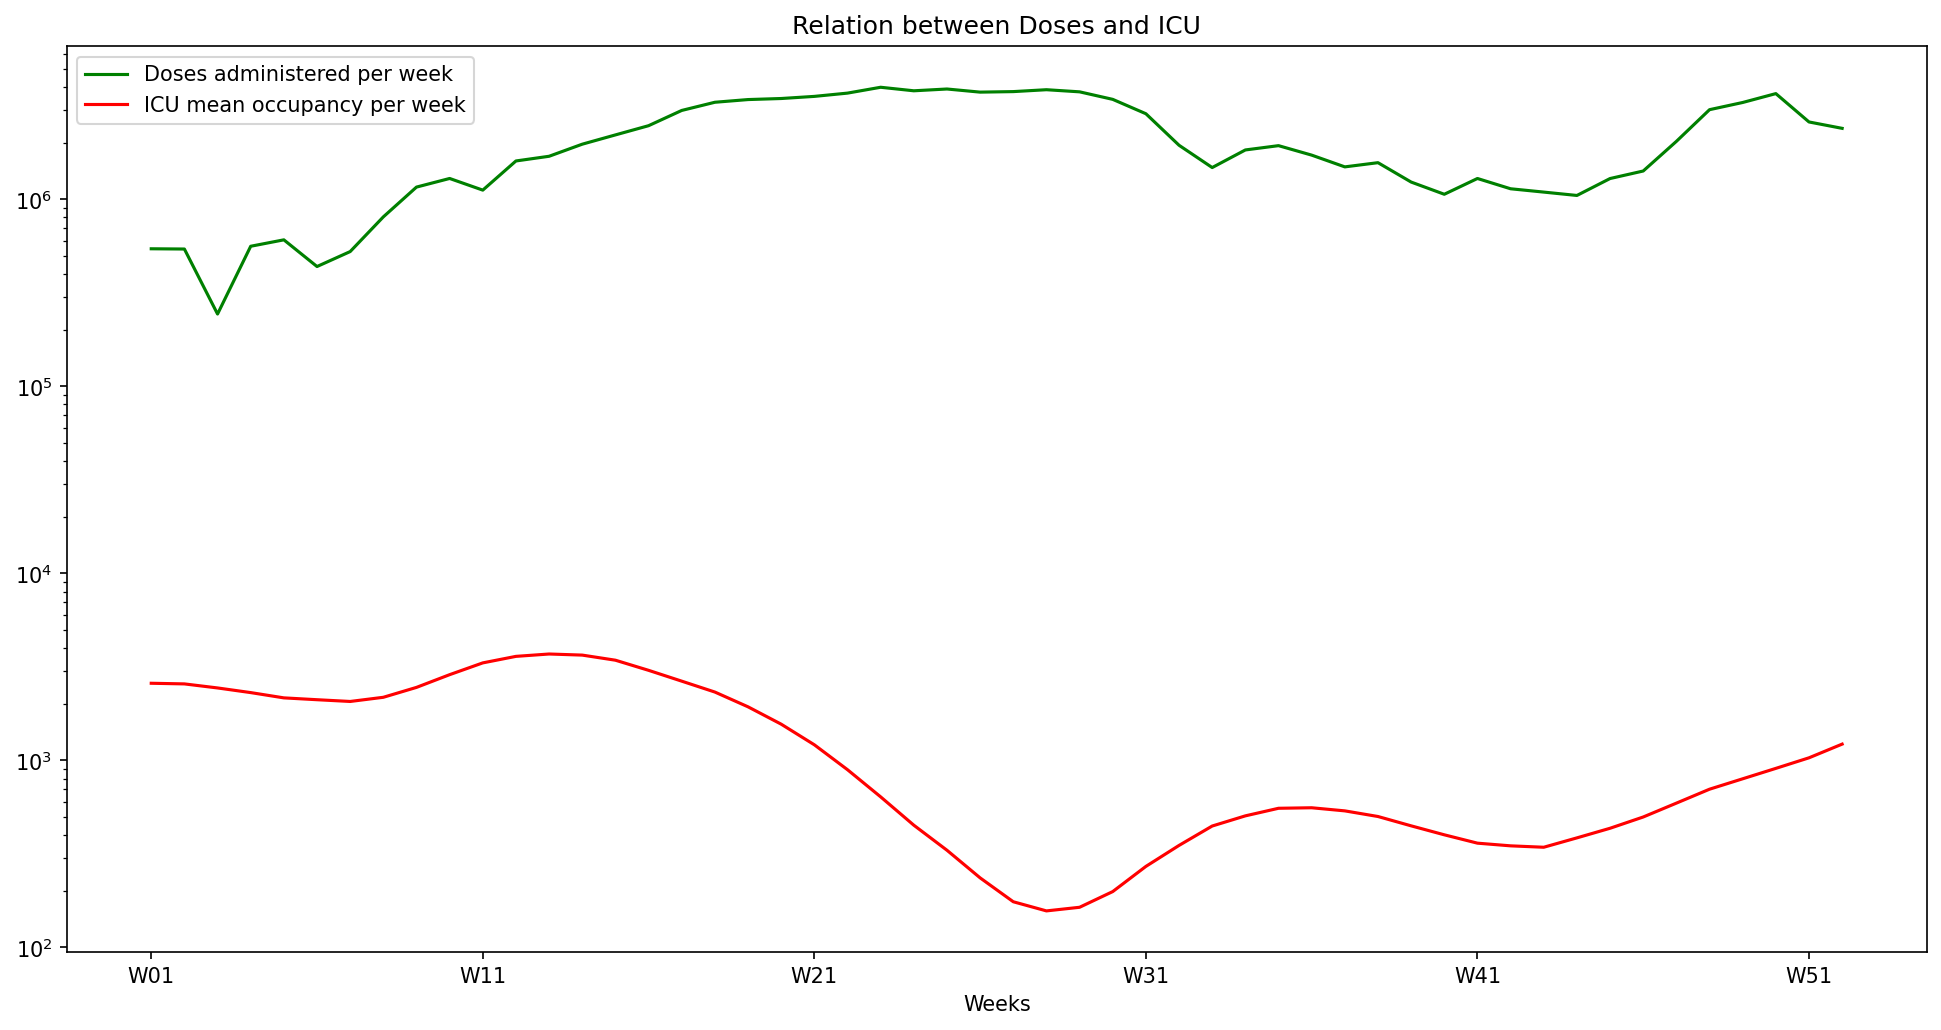

In [93]:
#GRAFICO DI CONFRONTO TRA DOSI SOMMINISTRATE E ICU NEL 2021
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)
  
table1['2021'].plot(label='Doses administered per week', color='green')
table_icu['Daily ICU occupancy'].plot(label='ICU mean occupancy per week', color='red')

#scale the y axis
plt.yscale("log")
  
# adding title to the plot
plt.title('Relation between Doses and ICU')
  
# adding Label to the x-axis
plt.xlabel('Weeks')
  
# adding legend to the curve
plt.legend()

plt.savefig('Relation between ICU occupancy and doses administered in 2021.jpeg', dpi=300, bbox_inches='tight')

